In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Ruta a la carpeta con resultados
results_dir = "results_vm_windows10"

# Cargar todos los archivos JSON de resultados
data = {}
for filename in os.listdir(results_dir):
    if filename.endswith(".json"):
        with open(os.path.join(results_dir, filename)) as f:
            data[filename] = json.load(f)

# Mostrar los archivos cargados
print(f"Archivos cargados: {list(data.keys())}")


Archivos cargados: ['results_vm_20250524_165929.json', 'results_vm_20250524_170001.json', 'results_vm_20250524_170026.json', 'results_vm_20250524_170125.json', 'results_vm_20250524_170300.json', 'results_vm_20250524_170420.json', 'results_vm_20250524_170555.json', 'results_vm_20250524_170654.json', 'results_vm_20250524_170818.json', 'results_vm_20250524_170858.json', 'results_vm_20250524_170947.json', 'results_vm_20250524_171122.json', 'results_vm_20250524_171314.json', 'results_vm_20250524_171417.json', 'results_vm_20250524_171551.json', 'results_vm_20250524_171645.json', 'results_vm_20250524_171823.json', 'results_vm_20250524_171947.json', 'results_vm_20250524_172032.json', 'results_vm_20250524_172113.json']


In [2]:
# Convertir los resultados a un DataFrame
rows = []
for file, tests in data.items():
    source = "docker" if "docker" in file.lower() else "vm"
    for test_name, result in tests.items():
        if "error" not in result:
            rows.append({
                "source": source,
                "file": file,
                "test": test_name,
                "cpu": result["cpu"],
                "memory": result["memory"],
                "time": result["time"]
            })

df = pd.DataFrame(rows)
df.head()


,source,file,test,cpu,memory,time
0,vm,results_vm_20250524_165929.json,idle,6.8,3.503906,3.202790
1,vm,results_vm_20250524_165929.json,cpu_stress,38.0,35.058594,6.827499
2,vm,results_vm_20250524_165929.json,cpu_multi,99.0,30.285156,9.571281
3,vm,results_vm_20250524_165929.json,memory_stress,100.0,1092.164062,3.772897
4,vm,results_vm_20250524_165929.json,memory_large,94.6,41.531250,2.527813


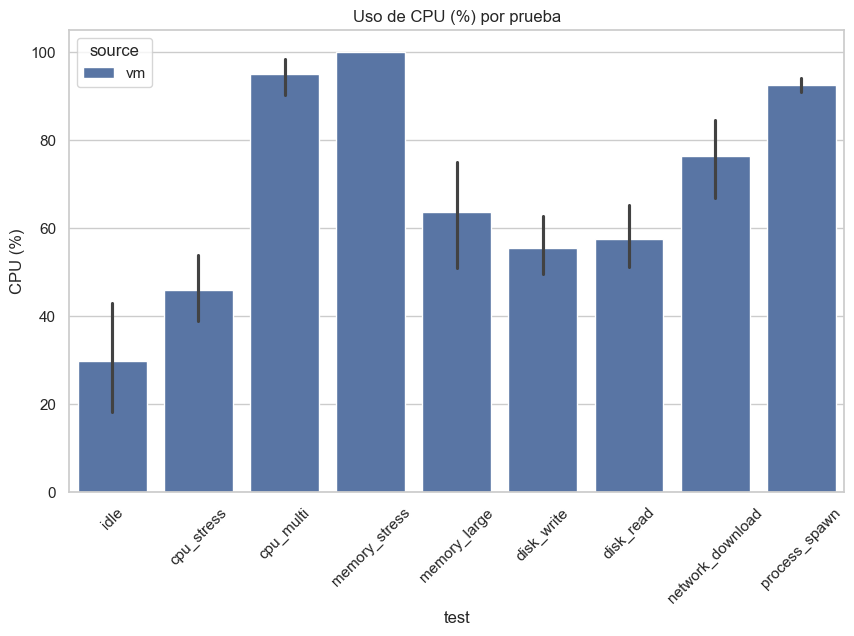

In [3]:
plt.figure()
sns.barplot(data=df, x="test", y="cpu", hue="source")
plt.title("Uso de CPU (%) por prueba")
plt.xticks(rotation=45)
plt.ylabel("CPU (%)")
plt.show()


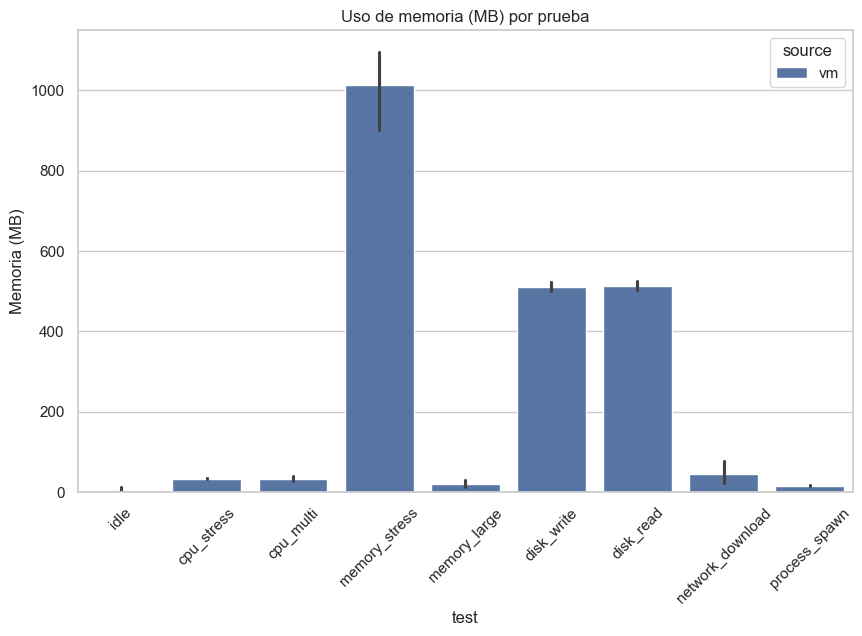

In [4]:
plt.figure()
sns.barplot(data=df, x="test", y="memory", hue="source")
plt.title("Uso de memoria (MB) por prueba")
plt.xticks(rotation=45)
plt.ylabel("Memoria (MB)")
plt.show()


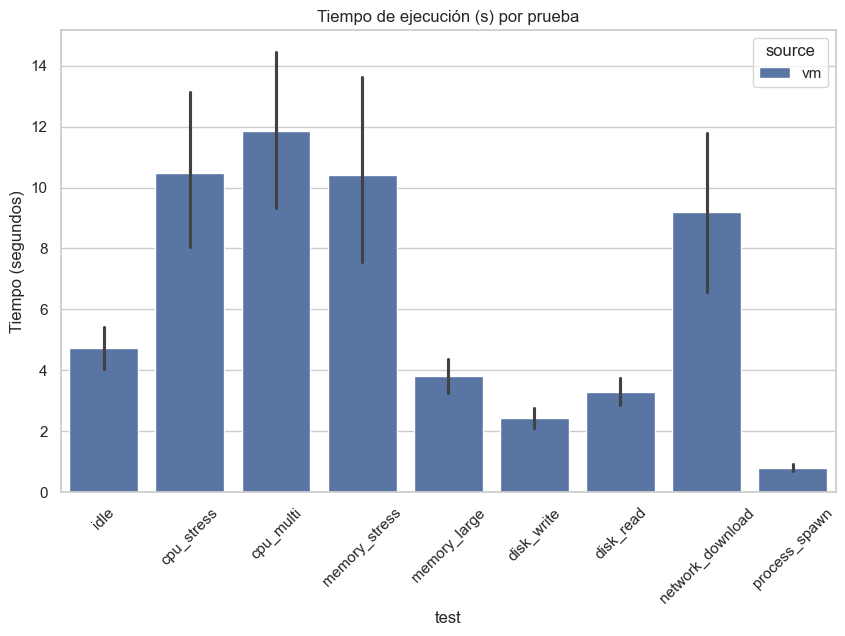

In [5]:
plt.figure()
sns.barplot(data=df, x="test", y="time", hue="source")
plt.title("Tiempo de ejecución (s) por prueba")
plt.xticks(rotation=45)
plt.ylabel("Tiempo (segundos)")
plt.show()


In [6]:
summary = df.groupby(["source", "test"]).agg(
    cpu_mean=("cpu", "mean"),
    cpu_std=("cpu", "std"),
    memory_mean=("memory", "mean"),
    memory_std=("memory", "std"),
    time_mean=("time", "mean"),
    time_std=("time", "std")
).reset_index()

summary


,source,test,cpu_mean,cpu_std,memory_mean,memory_std,time_mean,time_std
0,vm,cpu_multi,94.935,9.199730,32.925781,15.609674,11.840428,5.883019
1,vm,cpu_stress,45.855,17.330517,33.847461,5.138480,10.467367,5.911509
2,vm,disk_read,57.565,16.566081,512.018555,28.702388,3.283975,1.010759
3,vm,disk_write,55.540,15.033590,509.659375,27.644779,2.450736,0.793121
4,vm,idle,29.780,29.390342,5.536523,12.201966,4.746168,1.692762
5,vm,memory_large,63.640,28.273354,20.426953,20.640137,3.802944,1.282454
6,vm,memory_stress,100.000,0.000000,1012.460156,219.428990,10.425141,6.808444
7,vm,network_download,76.405,21.001390,46.168945,70.237040,9.197521,6.063117
8,vm,process_spawn,92.525,3.900051,16.394141,3.279485,0.808381,0.255272
